# Twitter API

## 1. Business Understanding

### 1.1 Overview

### 1.2 Problem Statement

### 1.3 Business Objectives

### 1.4 Business Success Criteria

## 2. Data Understanding

### 2.1 Collecting the Data

In [98]:
#! pip install wordninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
#Importing the libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
#import snscrape.modules.twitter as sntwitter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import warnings
import re 
import string
import wordninja 
from textblob import Word
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
warnings.filterwarnings("ignore")
# importing the libraries for classiffication
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score, auc, roc_curve, f1_score, precision_score,recall_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
# ! pip install textblob
# ! pip install sntwitter

In [101]:
# import os 
# from google.colab import drive
# drive.mount('/content/drive')
# os.listdir('/content/drive/MyDrive/tweaks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['1MillTweets.csv', 'Tweets_API.ipynb']

In [ ]:
# #Loading the data set
# tweets_df = pd.read_csv('/content/drive/MyDrive/tweaks/1MillTweets.csv')
# tweets_df.head()

In [102]:
#Loading the data set
tweets_df = pd.read_csv('1MillTweets.csv')
tweets_df.head()

,Datetime,Tweet Id,Text,Username,LikeCount
0,2022-12-14 23:47:00+00:00,1603174748451733504,Ditto @Safaricom_Care https://t.co/SgK6L3YQhd,OnguruMeister,0
1,2022-12-14 23:41:18+00:00,1603173313052037120,"@ital_john Hello John, the deadline was Octobe...",Safaricom_Care,0
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @AbdulahiAdan10 @Safaricom_Care @be...,I_im_kibagendi,0
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@Safaricom_Care, @SafaricomPLC we demand you ...",MutonyeMutuku_,2
4,2022-12-14 23:19:59+00:00,1603167951682764800,"Hey @Safaricom_Care @SafaricomPLC ,15th Decemb...",ndungujosephn,0


### 2.2 Describing the Data

#### 2.2.1 Description of the columns in the data set:

> * Datetime - This refers to the date of the tweet

> * Tweet Id - This refers to the unique id of the tweet

> * Text - This refers to the actual text in the tweet

> * Username - This refers to the name of the user who commented

> * Like Count -This refers to the number of likes a tweet receives

#### 2.2.2 Description of the size, statistics and data type

In [103]:
# creating a class that we will use to describe the data

class describing_the_data(object):
      def __init__(self, df):
        self.info = df.info
        self.shape = df.shape
        self.describe = df.describe()
        self.duplicates = df.duplicated().sum()
        self.missing = df.isna().sum()

In [104]:
#Instantiating the class
data_description = describing_the_data(tweets_df)

In [105]:
# describe the data type of the columns
data_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Datetime   1000001 non-null  object
 1   Tweet Id   1000001 non-null  int64 
 2   Text       1000001 non-null  object
 3   Username   1000001 non-null  object
 4   LikeCount  1000001 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 38.1+ MB


In [106]:
#shape of the data
data_description.shape

(1000001, 5)

In [107]:
#descriptive statistics of the data
data_description.describe

,Tweet Id,LikeCount
count,1.000001e+06,1.000001e+06
mean,1.342273e+18,7.958292e-01
std,1.550978e+17,2.739744e+01
min,1.055776e+18,0.000000e+00
25%,1.226837e+18,0.000000e+00
50%,1.322460e+18,0.000000e+00
75%,1.475853e+18,0.000000e+00
max,1.603175e+18,1.028200e+04


In [108]:
#checking for duplicates
data_description.duplicates

0

In [109]:
#checking for missing values
data_description.missing

Datetime     0
Tweet Id     0
Text         0
Username     0
LikeCount    0
dtype: int64

## 3. Data Preparation

### 3.1 Data Cleaning

In [110]:
#Removing Tweets by Safaricom in order to have tweets from their customers only
tweets_df = tweets_df[tweets_df['Username'] != 'Safaricom_Care']

In [111]:
#Instantiating the class
data_description_2 = describing_the_data(tweets_df)

In [112]:
data_description_2.shape

(740364, 5)

In [113]:
# Defining functions to clean data
def lower_case(tweet):
    tweet = tweet.lower() 
    return tweet

# def tokenization(tweet):
#     tweet = tweet.split() 

# def 

def remove_links(tweet):
    tweet = re.sub(r"https\S+"," ",tweet) #removes weblinks
    tweet = re.sub(r"bit.ly/\S+", " ",tweet) #removes weblinks
    return tweet

def remove_user(tweet):
    tweet = re.sub('(rt\s@[a-z]+[a-z0-9-_]+)', '',str(tweet)) #removes @user information
    tweet = re.sub('(@[a-z]+[a-z0-9-_]+)', '',str(tweet))#removes @user information
    return tweet

    # tweet = re.sub("(sxsw)"," ",tweet)
    # tweet = re.sub("(link)"," ",tweet)
# def remove_user(tweet):
#     tweet = re.sub('(rt\s@[a-z]+[a-z0-9-_]+)', '',tweet) #removes @user information
#     tweet = re.sub('(@[a-z]+[a-z0-9-_]+)', '',tweet) #removes @user information
#     # tweet = re.sub("(sxsw)"," ",tweet)
#     # tweet = re.sub("(link)"," ",tweet)
   
def remove_hashtags(tweet):
    tweeet = re.sub('(#[a-z]+[a-z0-9-_]+)', '',tweet) #removes the hashtags
    return tweet
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

# def remove_stopwords(tweet):
#     stop_words = stopwords.words('english')
#     new_stopwords = ["dm", "check", "kindly", "please", "na" , "ni", "get" , "ya", "hello", "still", "need", "cant", "help", 
#                  "even","hey", "like", "issue", "whats", "hii", "since", "hi", "kwa", "using", "dont", "assist", "im", "know", 
#                  "people", "someone", "thanks", "thank", "waiting", "today", "ive", "want", "us", "use", "ama", "without", 
#                  "trying", "guys", "happening"]
#     stop_words.extend(new_stopwords)
#     tweet = tweet.join(word for word in tweet.split () if word not in (stop_words))
#     return tweet

def basic_clean(tweet):
    """Returns cleaned data, remove punctuation and numbers"""
    tweet = lower_case(tweet)
#     tweet = tokenization(tweet)
    tweet = remove_user(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = deEmojify(tweet)
#     tweet = remove_stopwords(tweet)
    tweet = re.sub('['+ string.punctuation+ ']+', '',tweet) # Removes punctuation
    tweet = re.sub('([0-9]+)'," ",tweet) # Removes numbers
    return tweet


In [114]:
#creating a new column with the clean tweets
clean_data=[]
for i in tweets_df["Text"]:
    clean_data.append(basic_clean(i))

tweets_df['Clean_Tweets']=clean_data
    

In [115]:
tweets_df.head()

,Datetime,Tweet Id,Text,Username,LikeCount,Clean_Tweets
0,2022-12-14 23:47:00+00:00,1603174748451733504,Ditto @Safaricom_Care https://t.co/SgK6L3YQhd,OnguruMeister,0,ditto
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @AbdulahiAdan10 @Safaricom_Care @be...,I_im_kibagendi,0,i can see you have started and clearly thi...
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@Safaricom_Care, @SafaricomPLC we demand you ...",MutonyeMutuku_,2,we demand you issue a statement concerning ...
4,2022-12-14 23:19:59+00:00,1603167951682764800,"Hey @Safaricom_Care @SafaricomPLC ,15th Decemb...",ndungujosephn,0,hey th december is my birthday i can see it...
5,2022-12-14 23:00:12+00:00,1603162972456640517,@enockmogaka7 @SafaricomPLC @Safaricom_Care Th...,cellestialtech,0,the man is dead you buggers still holding ...


In [116]:
df = tweets_df[['Datetime','Tweet Id', 'Username', 'Clean_Tweets']]
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,i can see you have started and clearly thi...
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,we demand you issue a statement concerning ...
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,hey th december is my birthday i can see it...
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,the man is dead you buggers still holding ...


In [117]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740364 entries, 0 to 1000000
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Datetime      740364 non-null  datetime64[ns, UTC]
 1   Tweet Id      740364 non-null  int64              
 2   Username      740364 non-null  object             
 3   Clean_Tweets  740364 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 28.2+ MB


In [118]:
df["hour"] = df["Datetime"].apply(lambda x: x.hour)
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets,hour
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,i can see you have started and clearly thi...,23
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,we demand you issue a statement concerning ...,23
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,hey th december is my birthday i can see it...,23
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,the man is dead you buggers still holding ...,23


In [119]:
# a function for categorizing time
def get_time(hour):
  """ This function checks the time a tweet was tweeted and categorizes it as morning evening or afternoon"""
  if hour >=6 and hour < 12:
         return 'Morning'
  if hour > 12 and hour < 18:
        return 'Afternoon'
  else:
        return 'Evening'

In [120]:
df['Time_of_Day'] = df['hour'].apply(get_time)
df['Time_of_Day'].value_counts()

Morning      290148
Evening      226615
Afternoon    223601
Name: Time_of_Day, dtype: int64

In [121]:
# # Splitting concatenated words into separate words 
# df["Clean_Tweets"] = df.Clean_Tweets.apply(lambda x: wordninja.split(str(TextBlob(x))))  
# df["Clean_Tweets"] = df.Clean_Tweets.str.join(' ')
# df["Clean_Tweets"].head()

In [122]:
#Removing stopwords
stop_words = stopwords.words('english')
new_stopwords = ["dm", "check", "kindly", "please", "na" , "ni", "get" , "ya", "hello", "still", "need", "cant", "help", 
                 "even","hey", "like", "issue", "whats", "hii", "since", "hi", "kwa", "using", "dont", "assist", "im", "know", 
                 "people", "someone", "thanks", "thank", "waiting", "today", "ive", "want", "us", "use", "ama", "without", 
                 "trying", "guys", "happening"]
stop_words.extend(new_stopwords)
df["Clean_Tweets"] = df["Clean_Tweets"].apply(lambda x: ' '.join(word for word in x.split () if word not in (stop_words)))
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23,Evening
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening


In [123]:
# mapping the clean tweets to a new column in the dataframe
ls2=[]
for i in df["Clean_Tweets"]:
    ls2.append(basic_clean(i))

df['Clean_Tweets']=ls2
# check the df
df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23,Evening
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening
...,...,...,...,...,...,...
999996,2018-10-26 11:00:21+00:00,1055776139237568512,vincegfxpert,god knows happened quick responses forget,11,Morning
999997,2018-10-26 10:58:57+00:00,1055775786958024704,KThefirst,saf hamjawai nipromote si mfanye ivyo woiye na...,10,Morning
999998,2018-10-26 10:58:36+00:00,1055775697233424384,gimwesh,havent received promotion used safaricom yrs,10,Morning
999999,2018-10-26 10:58:27+00:00,1055775662072623105,hbograndmaster,chenye nishawahi shinda tu njaa,10,Morning


In [124]:
# frequent words
freq = pd.Series(' '.join(df.Clean_Tweets).split()).value_counts()[200:250]
freq

mb              3922
mobile          3912
shop            3901
say             3887
end             3870
taking          3859
text            3821
assistance      3820
true            3785
bank            3785
transactions    3779
thing           3703
n               3700
register        3700
support         3679
it’s            3668
cost            3668
offer           3664
confirm         3660
daily           3658
person          3634
ok              3623
lines           3620
doesnt          3593
place           3496
statement       3481
ethiopian       3455
kenyans         3444
okay            3441
wait            3438
contact         3427
hope            3415
advise          3404
kwani           3378
mtu             3374
saf             3368
poor            3365
refund          3354
loan            3353
asap            3353
happened        3334
ata             3322
coz             3320
must            3311
tigray          3309
follow          3300
youre           3295
code         

#### Creating Labels

In [125]:
# creating labels

# frequent words n tweets for categorization
mpesa = {"pesa", "m-pesa", "esa", "send money", "mpesa", "money", "till", "fuliza", "reverse", "transaction", 
         "transactions" "reversal" , "agent", "paybill", "buygoods", "statement", "loan", "bank", "cash", "recipient", 
         "mshwari", "withdraw","lipa", "reversed", "sentmoney", "kcb", "pay", "pochi", "pochilabiashara", "refund"}
voice = {"credit", "card",'credo', "okoa","credit", "airtime", "call", "minutes", "calls", "phone", "jahazi"}
internet = {"fibre", "fiber", "faiba",'safaricom home', "data", "internet", "bundles", "bundle", "network", "gb", "wifi", 
            "connection", "youtube", "net", "mbps", "mbs", "mb", "hanging"}
valueaddedservices = {"bonga", "daima" , "lipamdogomdogo", "hustler", "points", "customerobsessionmonth", "twendetukiuke" , 
                      "safaricomforyou", "uteowafuraha", "birthday", "app", "zuri", "csmonth", "tuinuane"}
customercare = {"simcards", "customer", "service", "customerservice", "poor", "problem", "register", "registration", 
                "registered", "scam", "sim"}
def label_tweet(tweet):
    if mpesa.intersection(tweet.split(" ")):
        return "mpesa"
    elif internet.intersection(tweet.split(" ")):
        return "internet"
    elif voice.intersection(tweet.split(" ")):
        return "voice"
    elif valueaddedservices.intersection(tweet.split(" ")):
        return "valueaddedservices"
    elif customercare.intersection(tweet.split(" ")):
        return "customercare"
    else:
        return "general"
# Add a new column to the dataframe with the labels for each tweet
df["Category"] = df['Clean_Tweets'].apply(label_tweet)
df["Category"].value_counts()


general               375824
mpesa                 120746
valueaddedservices     88090
internet               87654
voice                  43847
customercare           24203
Name: Category, dtype: int64

In [126]:
# removing tweets with less than three words 
df["Clean_Tweets"] = df.Clean_Tweets.apply(lambda x: x if len(x.split()) > 3 else None)
df = df.dropna()
df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening,general
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening,mpesa
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening,internet
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening,general
6,2022-12-14 22:58:45+00:00,1603162608898637824,LuckySa89737923,kumbe hizi bundles za saf huwa scam thought zi...,22,Evening,internet
...,...,...,...,...,...,...,...
999996,2018-10-26 11:00:21+00:00,1055776139237568512,vincegfxpert,god knows happened quick responses forget,11,Morning,general
999997,2018-10-26 10:58:57+00:00,1055775786958024704,KThefirst,saf hamjawai nipromote si mfanye ivyo woiye na...,10,Morning,general
999998,2018-10-26 10:58:36+00:00,1055775697233424384,gimwesh,havent received promotion used safaricom yrs,10,Morning,general
999999,2018-10-26 10:58:27+00:00,1055775662072623105,hbograndmaster,chenye nishawahi shinda tu njaa,10,Morning,general


### 3.2 Exploratory Data Analysis

---



#### 3.2.1 Univariate Data Analysis

In [127]:
#
def plot_3d_pie_chart(data,  labels):
  # Set figure size and style
  plt.figure(figsize=(8, 8))
  sns.set_style('darkgrid')

  # Create pie chart
  wedges, texts = plt.pie(data.value_counts(), labels=labels, shadow=True )

  # Set pie chart properties
  plt.title('3D Pie Chart')
  plt.legend(wedges, labels, title='Labels', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
  plt.axis('equal')

  # Show plot
  plt.show()


In [128]:
labels= set(df['Category'].values)

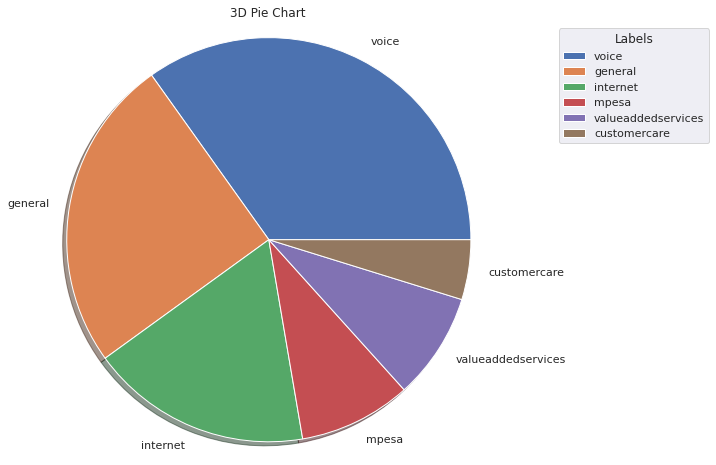

In [129]:
plot_3d_pie_chart(df['Category'] ,labels)

In [130]:
# a function for displaying a count plot
def count_plot(df,column):

  """This function  creates an sns countplot for a given column"""
  
  plt.figure(figsize=(16,8))
  sns.countplot(x=column,data=df, order=df[column].value_counts().iloc[:5].index, palette='BuPu')
  plt.title(f'{column}')
  plt.xlabel(column)
  plt.xticks(rotation=90)
  plt.show();

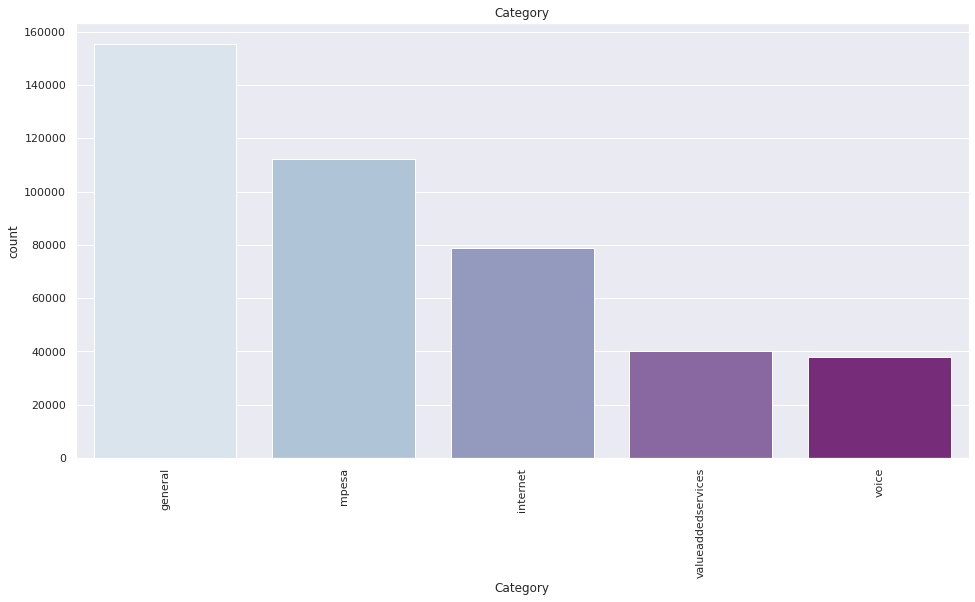

In [131]:
count_plot(df, 'Category')

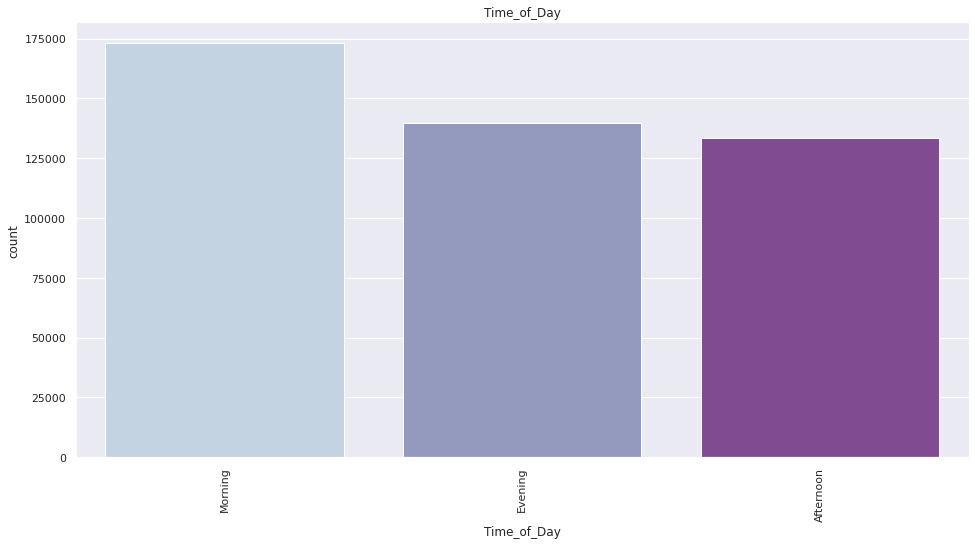

In [132]:
count_plot(df, 'Time_of_Day')

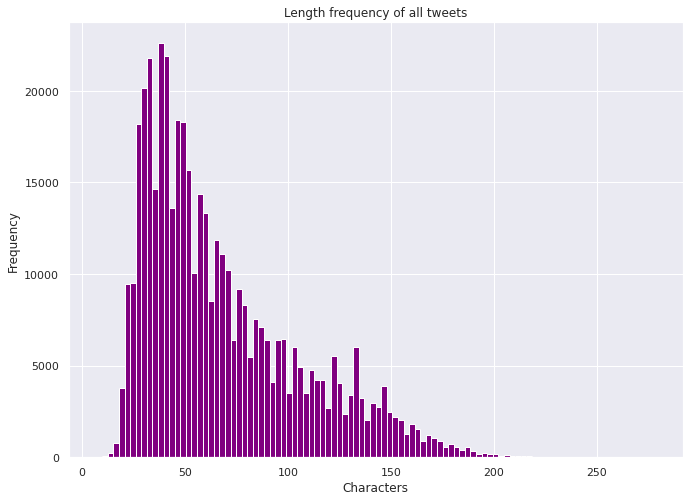

In [133]:
# Display the length of each tweet
df['Clean_Tweets'].apply(len).plot(bins=100, kind = 'hist',figsize = (11,8),color="purple")
plt.title('Length frequency of all tweets')
plt.xlabel("Characters")
plt.show()

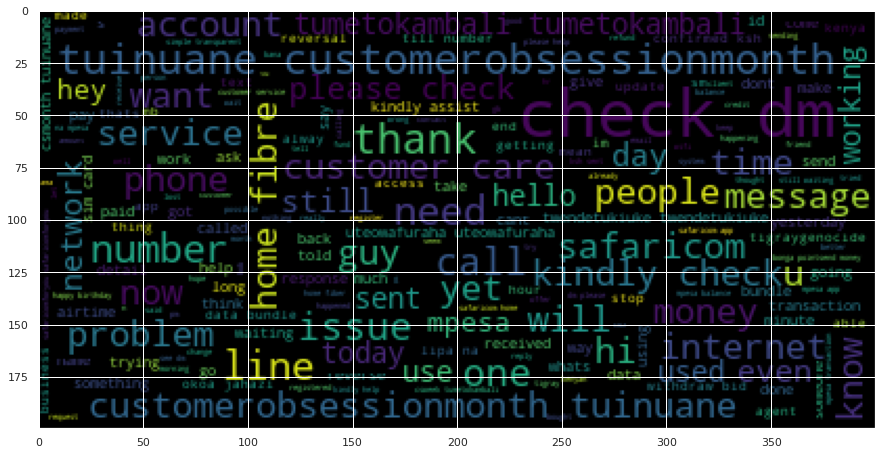

In [134]:
sentences = tweets_df['Clean_Tweets'].tolist()
sentences_ss = " ".join(sentences)

plt.figure(figsize=(15,15))
# plt.imshow(WordCloud(background_color='white',mask=twitter_mask).generate(sentences_ss))
plt.imshow(WordCloud().generate(sentences_ss))

#### 3.2.2 Bivariate Data Analysis

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

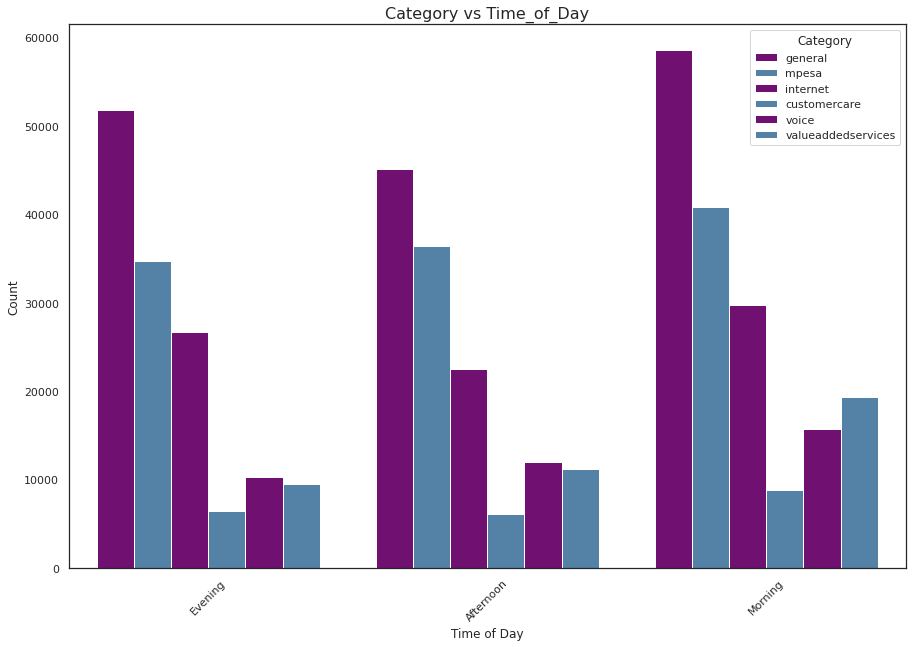

In [135]:
plt.figure(figsize=(15,10))

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.countplot(x='Time_of_Day', hue='Category', data=df,
            palette=['purple', 'steelblue'])

#add overall title
plt.title('Category vs Time_of_Day', fontsize=16)

#add axis titles
plt.xlabel('Time of Day')
plt.ylabel('Count')

#rotate x-axis labels
plt.xticks(rotation=45)

# Modelling 

In [136]:
df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening,general
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening,mpesa
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening,internet
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening,general
6,2022-12-14 22:58:45+00:00,1603162608898637824,LuckySa89737923,kumbe hizi bundles za saf huwa scam thought zi...,22,Evening,internet
...,...,...,...,...,...,...,...
999996,2018-10-26 11:00:21+00:00,1055776139237568512,vincegfxpert,god knows happened quick responses forget,11,Morning,general
999997,2018-10-26 10:58:57+00:00,1055775786958024704,KThefirst,saf hamjawai nipromote si mfanye ivyo woiye na...,10,Morning,general
999998,2018-10-26 10:58:36+00:00,1055775697233424384,gimwesh,havent received promotion used safaricom yrs,10,Morning,general
999999,2018-10-26 10:58:27+00:00,1055775662072623105,hbograndmaster,chenye nishawahi shinda tu njaa,10,Morning,general


In [137]:
# get_dummmies= pd.get_dummies(y) 
# get_dummmies

df["Category"] = df["Category"].astype('category')

df["cat_num"] = df["Category"].cat.codes


In [138]:
df['cat_num'].value_counts()

1    155486
3    112060
2     78976
4     40132
5     38074
0     21348
Name: cat_num, dtype: int64

In [139]:
df['Category'].value_counts()

general               155486
mpesa                 112060
internet               78976
valueaddedservices     40132
voice                  38074
customercare           21348
Name: Category, dtype: int64

In [140]:
X= df['Clean_Tweets']
y= df["cat_num"]
# Splitting the values to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.3)

#vectorize X_TRAIN AND X_TEST using tfidf vectorizer
tfidf= TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train

<312253x140038 sparse matrix of type '<class 'numpy.float64'>'
	with 2880179 stored elements in Compressed Sparse Row format>

In [141]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

In [142]:
#Defining a class for the classification models
class classification_model():
    def __init__(self, model, X_train, y_train, X_test, y_test):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.pred_test = None
    def fit_and_predict(self):
        print('**Fitting the train data...**')
        self.model.fit(self.X_train, self.y_train)
#         print('**Predicting the test data...**')
#         self.pred_test = self.model.predict(self.X_test)
        accuracy = self.model.score(X_test, y_test)
        print('**Accuracy for the predicted result is ' + str(accuracy*100) + '% **')
        self.pred_test= self.model.predict(X_test)
        target_names = ['customer_care', 'general', 'internet', 'mpesa', 'value_added_services', 'voice']
        labels = [0,1,2,3,4,5]
        report = classification_report(self.y_test, self.pred_test, target_names=target_names, labels=labels, output_dict=True)
        cl_report = pd.DataFrame(report).transpose()
        return cl_report
    def confusion_matrix(self):
      ConfusionMatrixDisplay.from_predictions(y_test, self.pred_test); 

    def ROC(self):
#         fpr, tpr, thresholds = roc_curve(self.y_test, model.predict_proba(self.X_test))
        pred_prob = self.model.predict_proba(self.X_test)
        y_test_binarized=label_binarize(self.y_test,classes=np.unique(self.y_test))
        fpr = {}
        tpr = {}
        thresh ={}
        roc_auc = dict()
        n_class = classes.shape[0]
        for i in range(n_class):
            fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            # plotting
            plt.plot(fpr[i], tpr[i], linestyle='--',
                     label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
        plt.plot([0,1],[0,1],'b--')
        plt.xlim([0,1])
        plt.ylim([0,1.05])
        plt.title('Multiclass ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='lower right')
        plt.show()
    def score(self):
        """This function outputs the f1 score and accuracy for the models"""
        y_pred_test = self.pred_test
        y_pred_train = self.model.predict(X_train)
        
        #Accuracy for both test and train
        test_accuracy = accuracy_score(y_test,y_pred_test)
        train_accuracy = accuracy_score(y_train,y_pred_train)
        
        #Precision on test only for now
        precision =precision_score(y_test, y_pred_test,average="weighted")

        #Recall for test 
        recall =recall_score(y_test, y_pred_test,average="weighted")
        
        #F1 on test set
        f1_test = f1_score(y_test,y_pred_test,average="weighted")

        return {
            "Train accuracy": train_accuracy,  
            "Test accuracy": test_accuracy,
            "Test Recall" :recall,
            "Test Precision":precision,
            "Test F1 score": f1_test
            }

#### 1. KNN Model

In [143]:
knn= KNeighborsClassifier()
Knn = classification_model(knn, X_train, y_train, X_test, y_test)


In [144]:
fit_n_report = Knn.fit_and_predict()
fit_n_report

**Fitting the train data...**
**Accuracy for the predicted result is 54.75889794728859% **


,precision,recall,f1-score,support
customer_care,0.673732,0.140003,0.231831,6357.000000
general,0.442619,0.969471,0.607761,46578.000000
internet,0.872497,0.239860,0.376277,23793.000000
mpesa,0.918236,0.343765,0.500249,33616.000000
value_added_services,0.890253,0.623831,0.733602,11976.000000
voice,0.843455,0.217335,0.345614,11503.000000
accuracy,0.547589,0.547589,0.547589,0.547589
macro avg,0.773465,0.422377,0.465889,133823.000000
weighted avg,0.724015,0.547589,0.510468,133823.000000


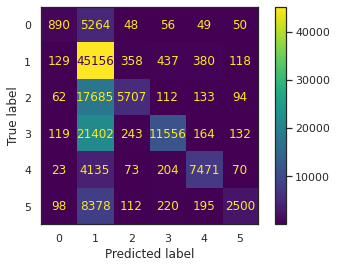

In [145]:
conf_matrix = Knn.confusion_matrix()
conf_matrix

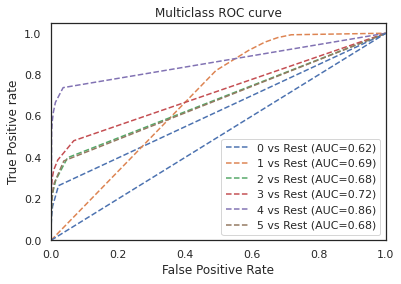

In [146]:
roc = Knn.ROC()

In [147]:
evaluation_df= pd.DataFrame()
evaluation_df['KNN']= Knn.score().values()
evaluation_df.index=['Train accuracy','Test accuracy','Test Recall','Test Precision','Test F1 score']
evaluation_df

KeyboardInterrupt: ignored

### 2. Decision Tree 

In [148]:
d_tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=3 , min_samples_split= 100)
Tree = classification_model(d_tree, X_train, y_train, X_test, y_test)

In [149]:
fit_n_report = Tree.fit_and_predict()
fit_n_report

**Fitting the train data...**
**Accuracy for the predicted result is 71.05430307196819% **


,precision,recall,f1-score,support
customer_care,0.000000,0.000000,0.000000,6357.000000
general,0.555456,0.999292,0.714023,46578.000000
internet,0.982546,0.771319,0.864213,23793.000000
mpesa,0.999031,0.613458,0.760146,33616.000000
value_added_services,0.907303,0.508350,0.651611,11976.000000
voice,0.870653,0.302530,0.449032,11503.000000
accuracy,0.710543,0.710543,0.710543,0.710543
macro avg,0.719165,0.532491,0.573171,133823.000000
weighted avg,0.775010,0.710543,0.690031,133823.000000


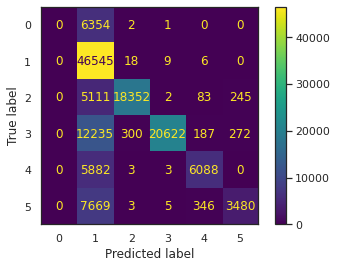

In [150]:
conf_matrix = Tree.confusion_matrix()
conf_matrix

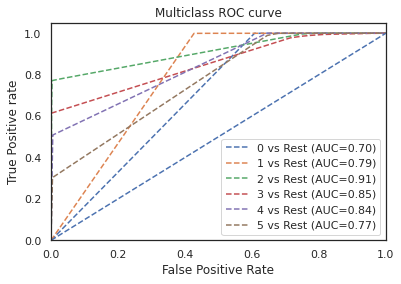

In [151]:
roc = Tree.ROC()

In [153]:
evaluation_df= pd.DataFrame()
evaluation_df.index=['Train accuracy','Test accuracy','Test Recall','Test Precision','Test F1 score']

In [154]:
evaluation_df['Tree']= Tree.score().values()
evaluation_df


,Tree
Train accuracy,0.711013
Test accuracy,0.710543
Test Recall,0.710543
Test Precision,0.775010
Test F1 score,0.690031


### 3. Random Forest

In [155]:
# fitting a random forest with 2 trees
forest = RandomForestClassifier(n_estimators= 2, random_state=2 )
Forest = classification_model(forest, X_train, y_train, X_test, y_test)

In [156]:
fit_n_report = Forest.fit_and_predict()
fit_n_report

**Fitting the train data...**
**Accuracy for the predicted result is 80.84559455400043% **


,precision,recall,f1-score,support
customer_care,0.544245,0.830109,0.657447,6357.000000
general,0.768505,0.935313,0.843743,46578.000000
internet,0.816873,0.796411,0.806512,23793.000000
mpesa,0.903268,0.748334,0.818534,33616.000000
value_added_services,0.928377,0.795508,0.856822,11976.000000
voice,0.932463,0.496914,0.648330,11503.000000
accuracy,0.808456,0.808456,0.808456,0.808456
macro avg,0.815622,0.767098,0.771898,133823.000000
weighted avg,0.828704,0.808456,0.806315,133823.000000


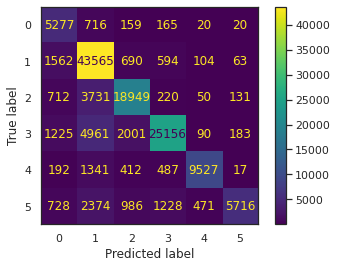

In [157]:
conf_matrix = Forest.confusion_matrix()
conf_matrix

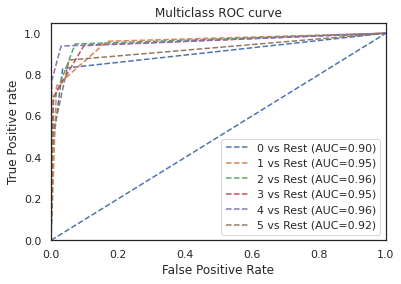

In [158]:
roc = Forest.ROC()

In [159]:
evaluation_df['Forest']= Forest.score().values()
evaluation_df

,Tree,Forest
Train accuracy,0.711013,0.930755
Test accuracy,0.710543,0.808456
Test Recall,0.710543,0.808456
Test Precision,0.775010,0.828704
Test F1 score,0.690031,0.806315


### 4. SVM

In [160]:
# #initializing the model
# svc= SVC()
# # fitting the model
# Svc = classification_model(svc, X_train, y_train, X_test, y_test)

In [161]:
# fit_n_report = Svc.fit_and_predict()
# fit_n_report


In [162]:
# conf_matrix = Svc.confusion_matrix()
# conf_matrix

In [163]:
# roc = Svc.ROC()

##### Decision Trees with GridSearchCV

In [164]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # create a list of values for each hyperparameter that you want to tune
# n_estimators = [10, 50, 100]
# max_depth = [None, 5, 10]
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]

# # create a parameter grid using the values you defined above
# param_grid = {'n_estimators': n_estimators,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf}

# # create a random forest classifier
# clf = RandomForestClassifier()

# # create a grid search object using the parameter grid and the random forest classifier
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # fit the grid search object to your training data
# grid_search.fit(X_train, y_train)

# # print the best parameters and score found on the training set
# print(grid_search.best_params_)
# print(grid_search.best_score_)

# # use the best parameters to make predictions on the test set
# y_pred = grid_search.predict(X_test)

### Boosted Models.

In [165]:
xgb= XGBClassifier()
Xgb = classification_model(xgb, X_train, y_train, X_test, y_test)


In [166]:
fit_n_report= Xgb.fit_and_predict()
fit_n_report

**Fitting the train data...**
**Accuracy for the predicted result is 94.72437473379016% **


,precision,recall,f1-score,support
customer_care,0.908358,0.921504,0.914884,6357.000000
general,0.925916,0.998454,0.960818,46578.000000
internet,0.967332,0.922204,0.944229,23793.000000
mpesa,0.998885,0.906384,0.950389,33616.000000
value_added_services,0.922635,0.951987,0.937081,11976.000000
voice,0.912358,0.920369,0.916346,11503.000000
accuracy,0.947244,0.947244,0.947244,0.947244
macro avg,0.939247,0.936817,0.937291,133823.000000
weighted avg,0.949316,0.947244,0.947120,133823.000000


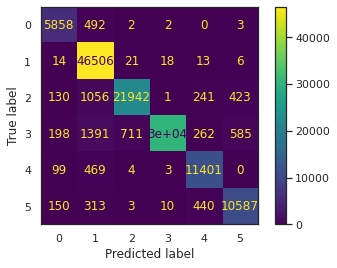

In [167]:
conf_matrix = Xgb.confusion_matrix()
conf_matrix

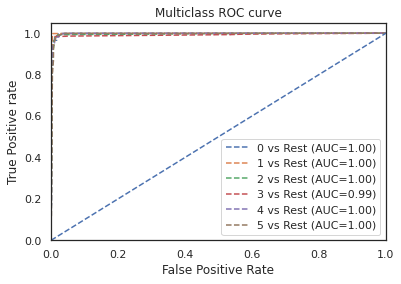

In [168]:
roc = Xgb.ROC()


In [169]:
evaluation_df['XGB']= Xgb.score().values()
evaluation_df

,Tree,Forest,XGB
Train accuracy,0.711013,0.930755,0.946825
Test accuracy,0.710543,0.808456,0.947244
Test Recall,0.710543,0.808456,0.947244
Test Precision,0.775010,0.828704,0.949316
Test F1 score,0.690031,0.806315,0.947120


### Model Evaluation

In [170]:
evaluation_df

,Tree,Forest,XGB
Train accuracy,0.711013,0.930755,0.946825
Test accuracy,0.710543,0.808456,0.947244
Test Recall,0.710543,0.808456,0.947244
Test Precision,0.775010,0.828704,0.949316
Test F1 score,0.690031,0.806315,0.947120


### Neural Networks

In [171]:
# importing libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense, Activation
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.utils import pad_sequences
from keras.layers import Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.utils import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

In [172]:
def score(model,X_train, X_test, y_train, y_test):
  
  """This function outputs the f1 score and accuracy for the models"""
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)
        
  #Accuracy for both test and train
  test_accuracy = accuracy_score(y_test,y_pred_test)
  train_accuracy = accuracy_score(y_train,y_pred_train)
        
  #Precision on test only for now
  precision =precision_score(y_test, y_pred_test,average="weighted")

  #Recall for test 
  recall =recall_score(y_test, y_pred_test,average="weighted")
        
  #F1 on test set
  f1_test = f1_score(y_test,y_pred_test,average="weighted")

  return {
      "Train accuracy": train_accuracy,  
      "Test accuracy": test_accuracy,
      "Test Recall" :recall,
      "Test Precision":precision,
      "Test F1 score": f1_test
      }

In [173]:
X= df['Clean_Tweets']
y= pd.get_dummies(df["Category"]).values

#tokenizing the values
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(X))
#making the tokens a sequence
list_tokenized_headlines = tokenizer.texts_to_sequences(X)
#padding
X_t = pad_sequences(list_tokenized_headlines, maxlen=100)

# Splitting the values to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_t, y, random_state= 42, test_size= 0.3)

# initializing the model
model = Sequential()
# Create the model
embedding_size = 128
model = Sequential()
model.add(Embedding(20000, embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(25))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, None, 25)          15400     
                                                                 
 dropout (Dropout)           (None, None, 25)          0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense (Dense)               (None, 6)                 156       
                                                                 
Total params: 2,580,656
Trainable params: 2,580,656
No

In [174]:
# scores = model.evaluate(X_test, y_test, verbose=0)
# scores

In [176]:
results= model.evaluate(X_test, y_test)
results

4182/4182 [==============================] - 106s 25ms/step - loss: 0.0035 - accuracy: 0.9997


[0.0034914312418550253, 0.99971604347229]

In [177]:
predictions= model.predict(X_test)
predictions

4182/4182 [==============================] - 106s 25ms/step


array([[2.5739544e-08, 2.0595072e-08, 9.9999768e-01, 2.5529485e-09,
        2.9453835e-09, 2.2959564e-06],
       [3.7439429e-14, 5.8164124e-10, 1.5988948e-11, 9.9999994e-01,
        3.1713829e-10, 1.1837488e-10],
       [9.9999350e-01, 3.4425541e-06, 2.2274362e-07, 4.6635865e-11,
        5.4254849e-07, 2.2024951e-06],
       ...,
       [9.9999976e-01, 5.5267289e-08, 2.5367431e-08, 1.1146633e-12,
        1.0742460e-07, 6.5428800e-08],
       [5.0439013e-14, 7.3461581e-10, 2.0673449e-11, 1.0000000e+00,
        4.0044493e-10, 1.4333121e-10],
       [3.2256292e-10, 3.9053422e-10, 1.0000000e+00, 7.8324056e-11,
        5.8774333e-11, 2.5268332e-09]], dtype=float32)

In [178]:
score(model,X_train, X_test, y_train, y_test)

9758/9758 [==============================] - 231s 24ms/step


ValueError: ignored

In [179]:
target= df['Category']
y = pd.get_dummies(target).values
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(df['Clean_Tweets']))
list_tokenized_tweets = tokenizer.texts_to_sequences(df['Clean_Tweets'])
X_t = pad_sequences(list_tokenized_tweets, maxlen=100)
X_train, X_test, y_train, y_test = train_test_split(X_t, y, random_state= 42, test_size= 0.2)

# create the model
model = Sequential()
# embedding
embedding_size = 128
model.add(Embedding(20000, embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
#compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_2 (LSTM)               (None, None, 25)          15400     
                                                                 
 global_max_pooling1d (Globa  (None, 25)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                1300      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                      

In [180]:
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
10037/10037 [==============================] - 865s 86ms/step - loss: 0.0946 - accuracy: 0.9694 - val_loss: 0.0016 - val_accuracy: 0.9999
Epoch 2/3
10037/10037 [==============================] - 856s 85ms/step - loss: 0.0184 - accuracy: 0.9952 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 3/3
10037/10037 [==============================] - 856s 85ms/step - loss: 0.0142 - accuracy: 0.9963 - val_loss: 0.0026 - val_accuracy: 1.0000


In [181]:
results= model.evaluate(X_test, y_test)
results

2788/2788 [==============================] - 40s 15ms/step - loss: 0.0014 - accuracy: 1.0000


[0.001354629173874855, 0.9999887943267822]

In [182]:
predictions= model.predict(X_test)
predictions

2788/2788 [==============================] - 40s 14ms/step


array([[3.5459365e-26, 1.2560813e-22, 9.9999970e-01, 2.0063548e-07,
        3.4236448e-21, 8.7484263e-20],
       [0.0000000e+00, 0.0000000e+00, 2.5163629e-35, 9.9999994e-01,
        0.0000000e+00, 0.0000000e+00],
       [9.9723637e-01, 2.7404821e-03, 2.1886266e-05, 5.0852447e-07,
        5.4516767e-07, 1.6016791e-07],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.2441133e-35, 9.9999994e-01,
        0.0000000e+00, 0.0000000e+00],
       [2.3091721e-34, 9.9999994e-01, 6.3873611e-36, 1.8872483e-31,
        1.7109790e-33, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 7.6114066e-37,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [183]:
scores= score(model,X_train, X_test, y_train, y_test)
scores

11152/11152 [==============================] - 161s 14ms/step


ValueError: ignored

In [195]:
# X= df['Clean_Tweets']
# y= pd.get_dummies(df["Category"]).values
# # Splitting the values to train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.3)
# tokenizer = text.Tokenizer(num_words=20000)
# tokenizer.fit_on_texts(list(X_train))
# list_tokenized_tweets = tokenizer.texts_to_sequences(X_train)
# X_t = pad_sequences(list_tokenized_tweets, maxlen=100)
# model = Sequential()
# # Create the model
# embedding_size = 128
# model = Sequential()
# model.add(Embedding(20000, embedding_size))
# model.add(LSTM(25, return_sequences=True))
# model.add(GlobalMaxPool1D())
# model.add(Dropout(0.5))
# model.add(LSTM(25,None))
# model.add(Dropout(0.5))
# model.add(Dense(6, activation='softmax'))
# model.compile(loss='categorical_crossentropy', 
#               optimizer='adam', 
#               metrics=['accuracy'])
# model.summary()
# model.fit(X_t, y_train, epochs=3, batch_size= 128, validation_split=0.2)

In [197]:
# tokenizer = text.Tokenizer(num_words=20000)
# tokenizer.fit_on_texts(list(X_test))
# list_tokenized_tweets = tokenizer.texts_to_sequences(X_test)
# X_test = pad_sequences(list_tokenized_tweets, maxlen=100)
# model.fit(X_test, y_train, epochs=3, batch_size=32, validation_split=0.1)